## Load dataset

In [155]:
import pandas as pd
from matplotlib import pyplot as plt

# load dataset
df = pd.read_csv('drug_dataset.csv')
df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


## Inspect dataset

In [156]:
df.describe()

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


In [157]:
# Check columns and types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

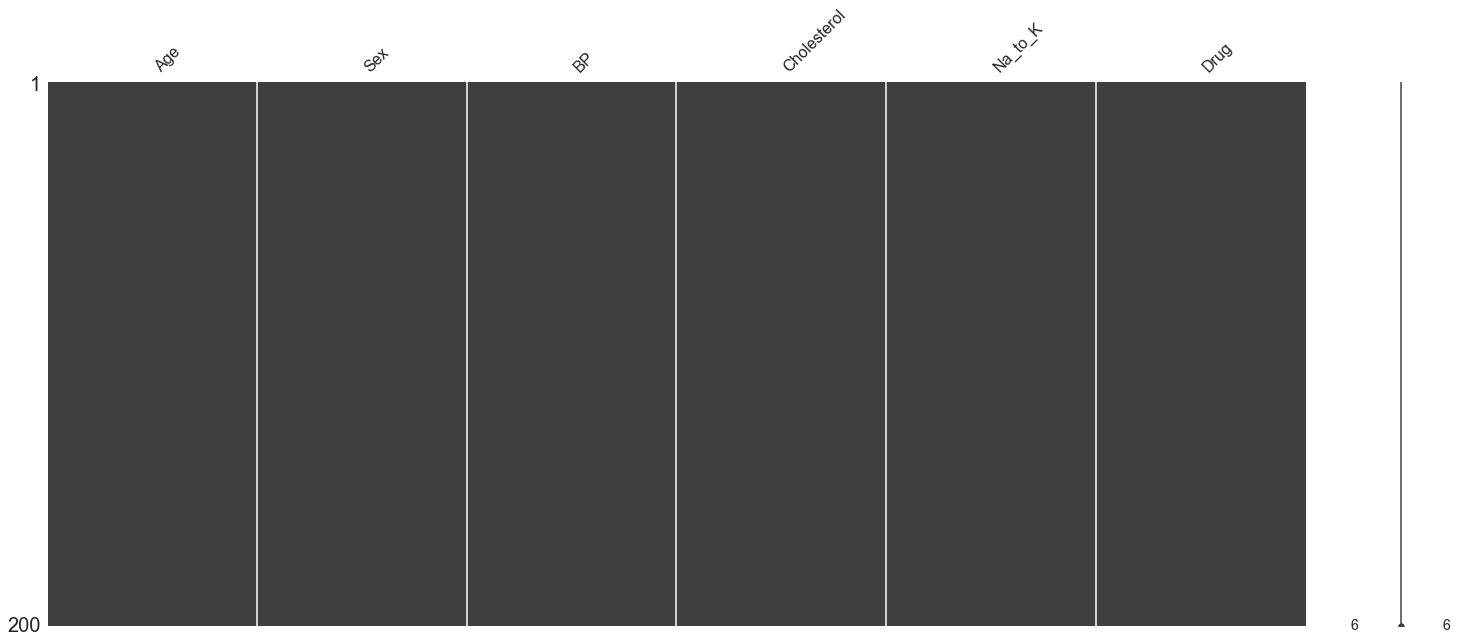

In [158]:
import missingno as msno

# check for NaN values
msno.matrix(df)

df.isna().sum()

In [159]:
df.duplicated().sum()

0

In [160]:
# Check labels
df['Drug'].value_counts()

DrugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: Drug, dtype: int64

<AxesSubplot:>

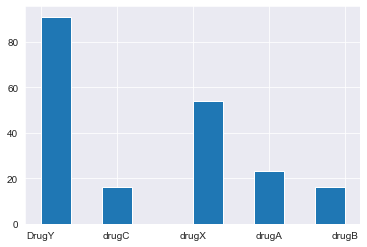

In [161]:
df['Drug'].hist()

## Data maipulation

In [162]:
import category_encoders as ce

# encode variables with ordinal encoding
encoder = ce.OrdinalEncoder(cols=['Sex', 'BP', 'Cholesterol'])

df = encoder.fit_transform(df)
df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,1,1,1,25.355,DrugY
1,47,2,2,1,13.093,drugC
2,47,2,2,1,10.114,drugC
3,28,1,3,1,7.798,drugX
4,61,1,2,1,18.043,DrugY
...,...,...,...,...,...,...
195,56,1,2,1,11.567,drugC
196,16,2,2,1,12.006,drugC
197,52,2,3,1,9.894,drugX
198,23,2,3,2,14.020,drugX


In [163]:
# get features
X = df.drop(['Drug'], axis=1)
X

,Age,Sex,BP,Cholesterol,Na_to_K
0,23,1,1,1,25.355
1,47,2,2,1,13.093
2,47,2,2,1,10.114
3,28,1,3,1,7.798
4,61,1,2,1,18.043
...,...,...,...,...,...
195,56,1,2,1,11.567
196,16,2,2,1,12.006
197,52,2,3,1,9.894
198,23,2,3,2,14.020


In [164]:
# get labels
y = df['Drug']
y

0      DrugY
1      drugC
2      drugC
3      drugX
4      DrugY
       ...  
195    drugC
196    drugC
197    drugX
198    drugX
199    drugX
Name: Drug, Length: 200, dtype: object

# Not normalized

In [165]:
from sklearn.model_selection import train_test_split

# split X and y into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42, stratify=y)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(140, 5) (60, 5) (140,) (60,)


In [166]:
scores = {}

## Decision Tree

In [167]:
from sklearn.tree import DecisionTreeClassifier

# build decision tree classifier
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=5, random_state=0)
# train decision tree
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=0)

In [168]:
from sklearn.metrics import classification_report

# make prediction
y_pred_clf_gini = clf_gini.predict(X_test)
print(f'Train accuracy:\t {clf_gini.score(X_train, y_train)}')
print(f'Test accuracy:\t {clf_gini.score(X_test, y_test)}')
scores['Decision Tree'] =  clf_gini.score(X_test, y_test)

print(classification_report(y_test, y_pred_clf_gini))

Train accuracy:	 1.0
Test accuracy:	 0.9833333333333333
              precision    recall  f1-score   support

       DrugY       0.96      1.00      0.98        27
       drugA       1.00      1.00      1.00         7
       drugB       1.00      1.00      1.00         5
       drugC       1.00      1.00      1.00         5
       drugX       1.00      0.94      0.97        16

    accuracy                           0.98        60
   macro avg       0.99      0.99      0.99        60
weighted avg       0.98      0.98      0.98        60



## KNeighbors

In [169]:
from sklearn.neighbors import KNeighborsClassifier

# build KNeighbors classifier
neigh = KNeighborsClassifier(n_neighbors=5)
# train KNeighbors
neigh.fit(X_train, y_train)

KNeighborsClassifier()

In [170]:
# make prediction
y_pred_neigh = neigh.predict(X_test)
print(f'Train accuracy:\t {neigh.score(X_train, y_train)}')
print(f'Test accuracy:\t {neigh.score(X_test, y_test)}')
scores['KNN'] =  neigh.score(X_test, y_test)

print(classification_report(y_test, y_pred_neigh))

Train accuracy:	 0.7785714285714286
Test accuracy:	 0.6166666666666667
              precision    recall  f1-score   support

       DrugY       0.83      0.93      0.88        27
       drugA       0.33      0.43      0.38         7
       drugB       0.33      0.20      0.25         5
       drugC       0.00      0.00      0.00         5
       drugX       0.50      0.50      0.50        16

    accuracy                           0.62        60
   macro avg       0.40      0.41      0.40        60
weighted avg       0.57      0.62      0.59        60



## MLP

C:\Users\lemos\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


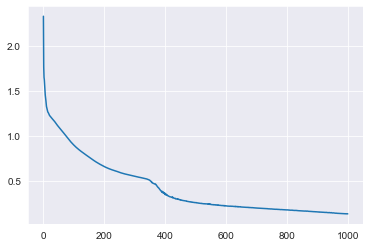

In [171]:
from sklearn.neural_network import MLPClassifier

# build MLP classifier
clf = MLPClassifier(hidden_layer_sizes=(200, 40, 10), activation='relu', solver='adam', max_iter=1000)
# train model
model = clf.fit(X_train, y_train)
plt.plot(clf.loss_curve_)

In [172]:
# make prediction
y_pred_mlp = model.predict(X_test)
print(f'Train accuracy:\t {model.score(X_train, y_train)}')
print(f'Test accuracy:\t {model.score(X_test, y_test)}')
scores['MLP'] =  model.score(X_test, y_test)

print(classification_report(y_test, y_pred_mlp))

Train accuracy:	 0.95
Test accuracy:	 0.8
              precision    recall  f1-score   support

       DrugY       0.81      0.96      0.88        27
       drugA       1.00      0.57      0.73         7
       drugB       0.60      0.60      0.60         5
       drugC       0.33      0.20      0.25         5
       drugX       0.88      0.88      0.88        16

    accuracy                           0.80        60
   macro avg       0.72      0.64      0.67        60
weighted avg       0.79      0.80      0.79        60



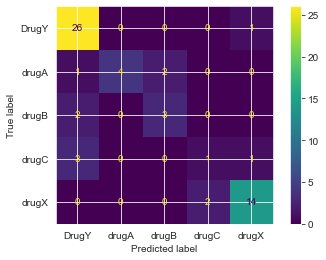

In [173]:
from sklearn.metrics import ConfusionMatrixDisplay

# plot_confusion_matrix(model, X_test, y_test)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_mlp)

## PCA

In [174]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
X_pca = pca.fit_transform(X)

X_pca.shape, y.shape

((200, 3), (200,))

In [175]:
pca.explained_variance_ratio_, pca.explained_variance_ratio_.sum()

(array([0.8376527 , 0.15882149, 0.002037  ]), 0.9985111868497313)

In [176]:
# split X and y into training and testing sets
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, y, test_size=0.30, random_state=42, stratify=y)

print(X_train_pca.shape, X_test_pca.shape, y_train_pca.shape, y_test_pca.shape)

(140, 3) (60, 3) (140,) (60,)


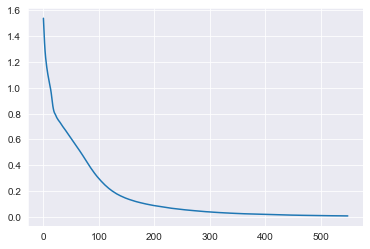

In [177]:
# build MLP classifier
clf_pca = MLPClassifier(hidden_layer_sizes=(200, 40, 10), activation='relu', solver='adam', max_iter=1000)
# train model
model_pca = clf_pca.fit(X_train_pca, y_train_pca)
plt.plot(clf_pca.loss_curve_)

In [178]:
# make prediction
y_pred_pca_mlp = model_pca.predict(X_test_pca)
print(f'Train accuracy:\t {model_pca.score(X_train_pca, y_train_pca)}')
print(f'Test accuracy:\t {model_pca.score(X_test_pca, y_test_pca)}')
scores['MLP_PCA'] =  model_pca.score(X_test_pca, y_test_pca)

print(classification_report(y_test_pca, y_pred_pca_mlp))

Train accuracy:	 1.0
Test accuracy:	 0.8833333333333333
              precision    recall  f1-score   support

       DrugY       0.96      0.96      0.96        27
       drugA       1.00      1.00      1.00         7
       drugB       0.83      1.00      0.91         5
       drugC       0.67      0.40      0.50         5
       drugX       0.76      0.81      0.79        16

    accuracy                           0.88        60
   macro avg       0.85      0.84      0.83        60
weighted avg       0.88      0.88      0.88        60



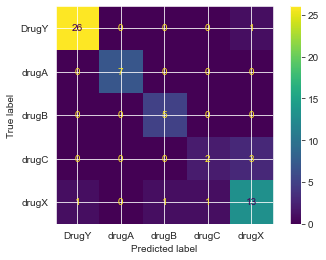

In [179]:
# plot_confusion_matrix(model, X_test, y_test)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_pca_mlp)

## LDA

In [180]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis(n_components=3)
X_lda = lda.fit(X, y).transform(X)
X_lda.shape

(200, 3)

In [181]:
# split X and y into training and testing sets
X_train_lda, X_test_lda, y_train_lda, y_test_lda = train_test_split(X_lda, y, test_size=0.30, random_state=42, stratify=y)

print(X_train_lda.shape, X_test_lda.shape, y_train_lda.shape, y_test_lda.shape)

(140, 3) (60, 3) (140,) (60,)


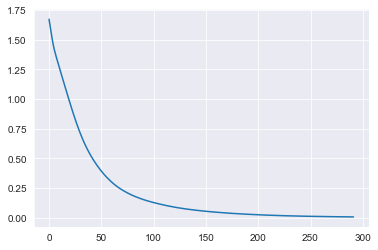

In [182]:
# build MLP classifier
clf_lda = MLPClassifier(hidden_layer_sizes=(200, 40, 10), activation='relu', solver='adam', max_iter=1000)
# train model
model_lda = clf_lda.fit(X_train_lda, y_train_lda)
plt.plot(clf_lda.loss_curve_)

In [183]:
# make prediction
y_pred_lda_mlp = model_lda.predict(X_test_lda)
print(f'Train accuracy:\t {model_lda.score(X_train_lda, y_train_lda)}')
print(f'Test accuracy:\t {model_lda.score(X_test_lda, y_test_lda)}')
scores['MLP_LDA'] =  model_lda.score(X_test_lda, y_test_lda)

print(classification_report(y_test_lda, y_pred_lda_mlp))

Train accuracy:	 1.0
Test accuracy:	 0.95
              precision    recall  f1-score   support

       DrugY       0.93      1.00      0.96        27
       drugA       1.00      0.86      0.92         7
       drugB       0.83      1.00      0.91         5
       drugC       1.00      0.60      0.75         5
       drugX       1.00      1.00      1.00        16

    accuracy                           0.95        60
   macro avg       0.95      0.89      0.91        60
weighted avg       0.96      0.95      0.95        60



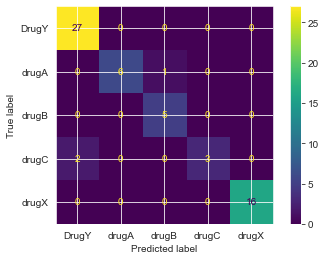

In [184]:
# plot_confusion_matrix(model_lda, X_test_lda, y_test_lda)
ConfusionMatrixDisplay.from_predictions(y_test_lda,y_pred_lda_mlp)

{'Decision Tree': 0.9833333333333333,
 'KNN': 0.6166666666666667,
 'MLP': 0.8,
 'MLP_PCA': 0.8833333333333333,
 'MLP_LDA': 0.95}

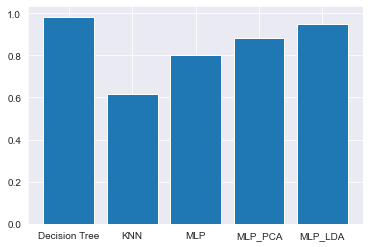

In [185]:
plt.bar(scores.keys(), scores.values())

scores

# Normalized

In [187]:
from sklearn.preprocessing import MinMaxScaler

# normalize values
scaler = MinMaxScaler()

df_scaled = df.copy()
df_scaled[['Age', 'Na_to_K']] = scaler.fit_transform(df_scaled[['Age', 'Na_to_K']])
df_scaled

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,0.135593,1,1,1,0.596848,DrugY
1,0.542373,2,2,1,0.213397,drugC
2,0.542373,2,2,1,0.120239,drugC
3,0.220339,1,3,1,0.047814,drugX
4,0.779661,1,2,1,0.368191,DrugY
...,...,...,...,...,...,...
195,0.694915,1,2,1,0.165676,drugC
196,0.016949,2,2,1,0.179405,drugC
197,0.627119,2,3,1,0.113359,drugX
198,0.135593,2,3,2,0.242385,drugX


In [189]:
# get features
X_scaled = df_scaled.drop(['Drug'], axis=1)
X_scaled

,Age,Sex,BP,Cholesterol,Na_to_K
0,0.135593,1,1,1,0.596848
1,0.542373,2,2,1,0.213397
2,0.542373,2,2,1,0.120239
3,0.220339,1,3,1,0.047814
4,0.779661,1,2,1,0.368191
...,...,...,...,...,...
195,0.694915,1,2,1,0.165676
196,0.016949,2,2,1,0.179405
197,0.627119,2,3,1,0.113359
198,0.135593,2,3,2,0.242385


In [191]:
# labels
y

0      DrugY
1      drugC
2      drugC
3      drugX
4      DrugY
       ...  
195    drugC
196    drugC
197    drugX
198    drugX
199    drugX
Name: Drug, Length: 200, dtype: object

In [192]:
# split X and y into training and testing sets
X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split(X_scaled, y, test_size=0.30, random_state=42, stratify=y)

print(X_train_scaled.shape, X_test_scaled.shape, y_train_scaled.shape, y_test_scaled.shape)

(140, 5) (60, 5) (140,) (60,)


In [193]:
scores_scaled = {}

## Decision Tree

In [196]:
from sklearn.tree import DecisionTreeClassifier

# build decision tree classifier
clf_gini_scaled = DecisionTreeClassifier(criterion='gini', max_depth=5, random_state=0)
# train decision tree
clf_gini_scaled.fit(X_train_scaled, y_train_scaled)

DecisionTreeClassifier(max_depth=5, random_state=0)

In [197]:
# make prediction
y_pred_clf_gini_scaled = clf_gini_scaled.predict(X_test)
print(f'Train accuracy:\t {clf_gini_scaled.score(X_train_scaled, y_train_scaled)}')
print(f'Test accuracy:\t {clf_gini_scaled.score(X_test_scaled, y_test_scaled)}')
scores_scaled['Decision Tree'] =  clf_gini_scaled.score(X_test_scaled, y_test_scaled)

print(classification_report(y_test_scaled, y_pred_clf_gini_scaled))

Train accuracy:	 1.0
Test accuracy:	 0.9666666666666667
              precision    recall  f1-score   support

       DrugY       0.45      1.00      0.62        27
       drugA       0.00      0.00      0.00         7
       drugB       0.00      0.00      0.00         5
       drugC       0.00      0.00      0.00         5
       drugX       0.00      0.00      0.00        16

    accuracy                           0.45        60
   macro avg       0.09      0.20      0.12        60
weighted avg       0.20      0.45      0.28        60



C:\Users\lemos\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\lemos\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\lemos\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## KNeighbors

In [198]:
from sklearn.neighbors import KNeighborsClassifier

# build KNeighbors classifier
neigh_scaled = KNeighborsClassifier(n_neighbors=5)
# train KNeighbors
neigh_scaled.fit(X_train_scaled, y_train_scaled)

KNeighborsClassifier()

In [199]:
# make prediction
y_pred_neigh_scaled = neigh_scaled.predict(X_test_scaled)
print(f'Train accuracy:\t {neigh_scaled.score(X_train_scaled, y_train_scaled)}')
print(f'Test accuracy:\t {neigh_scaled.score(X_test_scaled, y_test_scaled)}')
scores_scaled['KNN'] =  neigh_scaled.score(X_test_scaled, y_test_scaled)

print(classification_report(y_test_scaled, y_pred_neigh_scaled))

Train accuracy:	 0.8428571428571429
Test accuracy:	 0.6166666666666667
              precision    recall  f1-score   support

       DrugY       0.57      0.59      0.58        27
       drugA       0.80      0.57      0.67         7
       drugB       0.00      0.00      0.00         5
       drugC       0.50      0.60      0.55         5
       drugX       0.67      0.88      0.76        16

    accuracy                           0.62        60
   macro avg       0.51      0.53      0.51        60
weighted avg       0.57      0.62      0.59        60



C:\Users\lemos\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\lemos\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\lemos\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## MLP

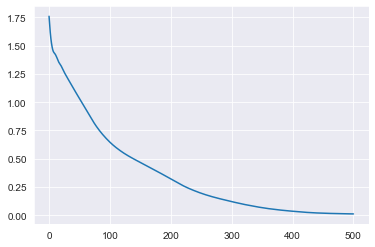

In [200]:
from sklearn.neural_network import MLPClassifier

# build MLP classifier
clf_scaled = MLPClassifier(hidden_layer_sizes=(200, 40, 10), activation='relu', solver='adam', max_iter=1000)
# train model
model_scaled = clf_scaled.fit(X_train_scaled, y_train_scaled)
plt.plot(clf_scaled.loss_curve_)

In [201]:
# make prediction
y_pred_mlp_scaled = model_scaled.predict(X_test_scaled)
print(f'Train accuracy:\t {model_scaled.score(X_train_scaled, y_train_scaled)}')
print(f'Test accuracy:\t {model_scaled.score(X_test_scaled, y_test_scaled)}')
scores_scaled['MLP'] =  model_scaled.score(X_test_scaled, y_test_scaled)

print(classification_report(y_test_scaled, y_pred_mlp_scaled))

Train accuracy:	 1.0
Test accuracy:	 0.9833333333333333
              precision    recall  f1-score   support

       DrugY       1.00      0.96      0.98        27
       drugA       1.00      1.00      1.00         7
       drugB       1.00      1.00      1.00         5
       drugC       1.00      1.00      1.00         5
       drugX       0.94      1.00      0.97        16

    accuracy                           0.98        60
   macro avg       0.99      0.99      0.99        60
weighted avg       0.98      0.98      0.98        60



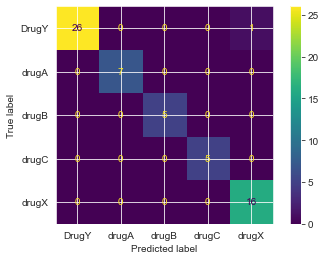

In [204]:
# plot_confusion_matrix(model, X_test, y_test)
ConfusionMatrixDisplay.from_predictions(y_test_scaled, y_pred_mlp_scaled)

## PCA

In [205]:
from sklearn.decomposition import PCA

pca_scaled = PCA(n_components=3)
X_pca_scaled = pca_scaled.fit_transform(X_scaled)

X_pca_scaled.shape, y.shape

((200, 3), (200,))

In [206]:
pca_scaled.explained_variance_ratio_, pca_scaled.explained_variance_ratio_.sum()

(array([0.52358648, 0.19437129, 0.18598048]), 0.9039382535253316)

In [207]:
# split X and y into training and testing sets
X_train_pca_scaled, X_test_pca_scaled, y_train_pca_scaled, y_test_pca_scaled = train_test_split(X_pca_scaled, y, test_size=0.30, random_state=42, stratify=y)

print(X_train_pca_scaled.shape, X_test_pca_scaled.shape, y_train_pca_scaled.shape, y_test_pca_scaled.shape)

(140, 3) (60, 3) (140,) (60,)


C:\Users\lemos\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


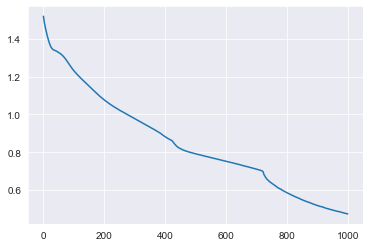

In [208]:
# build MLP classifier
clf_pca_scaled = MLPClassifier(hidden_layer_sizes=(200, 40, 10), activation='relu', solver='adam', max_iter=1000)
# train model
model_pca_scaled = clf_pca_scaled.fit(X_train_pca_scaled, y_train_pca_scaled)
plt.plot(clf_pca_scaled.loss_curve_)

In [209]:
# make prediction
y_pred_pca_mlp_scaled = model_pca_scaled.predict(X_test_pca_scaled)
print(f'Train accuracy:\t {model_pca_scaled.score(X_train_pca_scaled, y_train_pca_scaled)}')
print(f'Test accuracy:\t {model_pca_scaled.score(X_test_pca_scaled, y_test_pca_scaled)}')
scores_scaled['MLP_PCA'] =  model_pca_scaled.score(X_test_pca_scaled, y_test_pca_scaled)

print(classification_report(y_test_pca_scaled, y_pred_pca_mlp_scaled))

Train accuracy:	 0.8
Test accuracy:	 0.65
              precision    recall  f1-score   support

       DrugY       0.61      0.74      0.67        27
       drugA       0.50      0.29      0.36         7
       drugB       0.00      0.00      0.00         5
       drugC       1.00      0.60      0.75         5
       drugX       0.70      0.88      0.78        16

    accuracy                           0.65        60
   macro avg       0.56      0.50      0.51        60
weighted avg       0.60      0.65      0.61        60



C:\Users\lemos\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\lemos\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\lemos\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


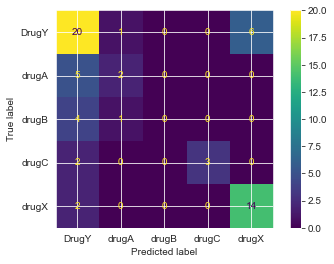

In [210]:
# plot_confusion_matrix(model, X_test, y_test)
ConfusionMatrixDisplay.from_predictions(y_test_scaled, y_pred_pca_mlp_scaled)

## LDA

In [211]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda_scaled = LinearDiscriminantAnalysis(n_components=3)
X_lda_scaled = lda.fit(X_scaled, y).transform(X_scaled)
X_lda_scaled.shape

(200, 3)

In [212]:
# split X and y into training and testing sets
X_train_lda_scaled, X_test_lda_scaled, y_train_lda_scaled, y_test_lda_scaled= train_test_split(X_lda_scaled, y, test_size=0.30, random_state=42, stratify=y)

print(X_train_lda_scaled.shape, X_test_lda_scaled.shape, y_train_lda_scaled.shape, y_test_lda_scaled.shape)

(140, 3) (60, 3) (140,) (60,)


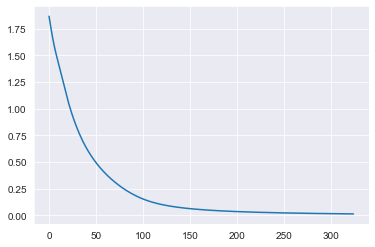

In [213]:
# build MLP classifier
clf_lda_scaled = MLPClassifier(hidden_layer_sizes=(200, 40, 10), activation='relu', solver='adam', max_iter=1000)
# train model
model_lda_scaled = clf_lda_scaled.fit(X_train_lda_scaled, y_train_lda_scaled)
plt.plot(clf_lda_scaled.loss_curve_)

In [214]:
# make prediction
y_pred_lda_mlp_scaled = model_lda_scaled.predict(X_test_lda_scaled)
print(f'Train accuracy:\t {model_lda_scaled.score(X_train_lda_scaled, y_train_lda_scaled)}')
print(f'Test accuracy:\t {model_lda_scaled.score(X_test_lda_scaled, y_test_lda_scaled)}')
scores_scaled['MLP_LDA'] =  model_lda_scaled.score(X_test_lda_scaled, y_test_lda_scaled)

print(classification_report(y_test_lda_scaled, y_pred_lda_mlp_scaled))

Train accuracy:	 1.0
Test accuracy:	 0.95
              precision    recall  f1-score   support

       DrugY       0.93      1.00      0.96        27
       drugA       1.00      0.86      0.92         7
       drugB       0.83      1.00      0.91         5
       drugC       1.00      0.60      0.75         5
       drugX       1.00      1.00      1.00        16

    accuracy                           0.95        60
   macro avg       0.95      0.89      0.91        60
weighted avg       0.96      0.95      0.95        60



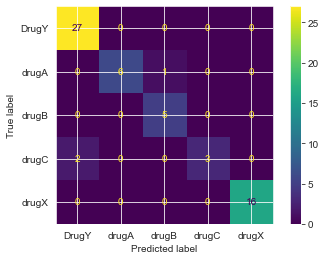

In [215]:
# plot_confusion_matrix(model_lda, X_test_lda, y_test_lda)
ConfusionMatrixDisplay.from_predictions(y_test_lda,y_pred_lda_mlp)

{'Decision Tree': 0.9666666666666667,
 'KNN': 0.6166666666666667,
 'MLP': 0.9833333333333333,
 'MLP_PCA': 0.65,
 'MLP_LDA': 0.95}

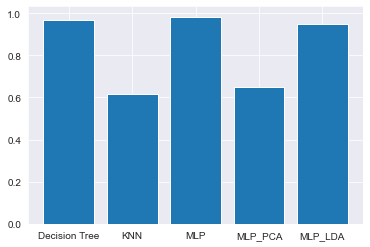

In [216]:
plt.bar(scores_scaled.keys(), scores_scaled.values())
scores_scaled